### Student Information
Name: 陳奕睿

Student ID: 110033624

GitHub ID: Eric870916

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

In [2]:
# import the all the moudule needed later
import pandas as pd
import numpy as np
import helpers.data_mining_helpers as dmh
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from sklearn.decomposition import PCA
import plotly.express as px
import math
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
from sklearn.preprocessing import binarize
from sklearn.metrics.pairwise import cosine_similarity

# Part 2
## 1. Data Preparation

In [3]:
# Read data from txt file
f = open('new_dataset.txt', 'r', encoding="utf-8")
lines = f.readlines()
f.close()

# Split each data into sentence and score
data = []
for line in lines:
    line = line.split('\t')
    line[1] = line[1].split('\n')[0]
    line[1] = int(line[1])
    line = tuple(line)
    data.append(line)

# Transform data into DataFrame form
X = pd.DataFrame.from_records(data, columns=['sentence', 'score'])
X

,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2995,I think food should have flavor and texture an...,0
2996,Appetite instantly gone.,0
2997,Overall I was not impressed and would not go b...,0
2998,"The whole experience was underwhelming, and I ...",0


In [4]:
# Add a column which indicates the sentiment of each data
X['sentiment'] = 'none'
for i in range(len(X)):
    if X.iloc[i]['score'] == 1:
        X.at[i,'sentiment'] = 'positive'
    else:
        X.at[i,'sentiment'] = 'negtive'
X

,sentence,score,sentiment
0,So there is no way for me to plug it in here i...,0,negtive
1,"Good case, Excellent value.",1,positive
2,Great for the jawbone.,1,positive
3,Tied to charger for conversations lasting more...,0,negtive
4,The mic is great.,1,positive
...,...,...,...
2995,I think food should have flavor and texture an...,0,negtive
2996,Appetite instantly gone.,0,negtive
2997,Overall I was not impressed and would not go b...,0,negtive
2998,"The whole experience was underwhelming, and I ...",0,negtive


In [5]:
X['source'] = 'none'
for i in range(len(X)):
    if i < 1000:
        X.at[i,'source'] = 'amazon_cell'
    elif i < 2000:
        X.at[i,'source'] = 'imdb'
    elif i < 3000:
        X.at[i,'source'] = 'yelp'
X

,sentence,score,sentiment,source
0,So there is no way for me to plug it in here i...,0,negtive,amazon_cell
1,"Good case, Excellent value.",1,positive,amazon_cell
2,Great for the jawbone.,1,positive,amazon_cell
3,Tied to charger for conversations lasting more...,0,negtive,amazon_cell
4,The mic is great.,1,positive,amazon_cell
...,...,...,...,...
2995,I think food should have flavor and texture an...,0,negtive,yelp
2996,Appetite instantly gone.,0,negtive,yelp
2997,Overall I was not impressed and would not go b...,0,negtive,yelp
2998,"The whole experience was underwhelming, and I ...",0,negtive,yelp


## 2. Data Mining using Pandas

In [6]:
# Find is there any missing value in each data
X.isnull()

,sentence,score,sentiment,source
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
2995,False,False,False,False
2996,False,False,False,False
2997,False,False,False,False
2998,False,False,False,False


In [7]:
# Find the total missing values in each data
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,sentiment,source
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


In [8]:
# Find the total missing values in each data
X.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2995    (The amoung of missing records is: , 0)
2996    (The amoung of missing records is: , 0)
2997    (The amoung of missing records is: , 0)
2998    (The amoung of missing records is: , 0)
2999    (The amoung of missing records is: , 0)
Length: 3000, dtype: object

In [9]:
# Add a dummy series to dataset
dummy_series = pd.Series(["dummy_record"], index=["sentence"])
X.append(dummy_series, ignore_index=True)

,sentence,score,sentiment,source
0,So there is no way for me to plug it in here i...,0.0,negtive,amazon_cell
1,"Good case, Excellent value.",1.0,positive,amazon_cell
2,Great for the jawbone.,1.0,positive,amazon_cell
3,Tied to charger for conversations lasting more...,0.0,negtive,amazon_cell
4,The mic is great.,1.0,positive,amazon_cell
...,...,...,...,...
2996,Appetite instantly gone.,0.0,negtive,yelp
2997,Overall I was not impressed and would not go b...,0.0,negtive,yelp
2998,"The whole experience was underwhelming, and I ...",0.0,negtive,yelp
2999,"Then, as if I hadn't wasted enough of my life ...",0.0,negtive,yelp


In [10]:
# Find the total missing values in each data
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,sentiment,source
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


In [11]:
X.dropna(inplace=True)
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,sentiment,source
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


In [12]:
# Find duplicated datas
sum(X.duplicated())
X[X.duplicated()]

,sentence,score,sentiment,source
285,Great phone!.,1,positive,amazon_cell
407,Works great.,1,positive,amazon_cell
524,Works great!.,1,positive,amazon_cell
543,Don't buy this product.,0,negtive,amazon_cell
744,If you like a loud buzzing to override all you...,0,negtive,amazon_cell
748,Does not fit.,0,negtive,amazon_cell
778,This is a great deal.,1,positive,amazon_cell
792,Great Phone.,1,positive,amazon_cell
892,Excellent product for the price.,1,positive,amazon_cell
896,Great phone.,1,positive,amazon_cell


In [13]:
# Check the length of the dataset after removing duplicated datas
X.drop_duplicates(inplace=True)
len(X)

2983

## 3.  Data Preprocessing
### 3.1 Sampling

In [14]:
# Sample 1000 data from the dataset
X_sample = X.sample(n=1000)
len(X_sample)

1000

negtive     1493
positive    1490
Name: sentiment, dtype: int64


<AxesSubplot:title={'center':'Sentiment distribution'}>

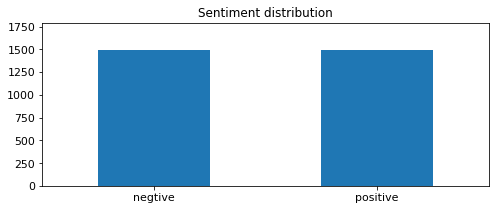

In [15]:
# Plot the bar figure of sentiment distribution in the sample
upper_bonud = max(X.sentiment.value_counts()) *1.2

print(X.sentiment.value_counts())

X.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'Sentiment distribution',
                                    ylim = [0, upper_bonud],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

positive    518
negtive     482
Name: sentiment, dtype: int64


<AxesSubplot:title={'center':'Sentiment distribution'}>

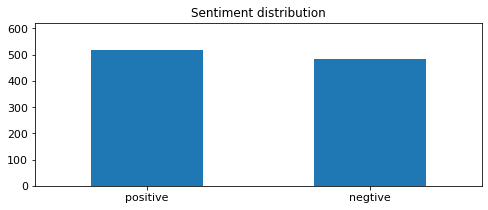

In [16]:
# Plot the bar figure of sentiment distribution in the dataset
upper_bonud = max(X_sample.sentiment.value_counts()) *1.2

print(X_sample.sentiment.value_counts())

X_sample.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'Sentiment distribution',
                                    ylim = [0, upper_bonud],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

<AxesSubplot:title={'center':'Sentiment distribution'}>

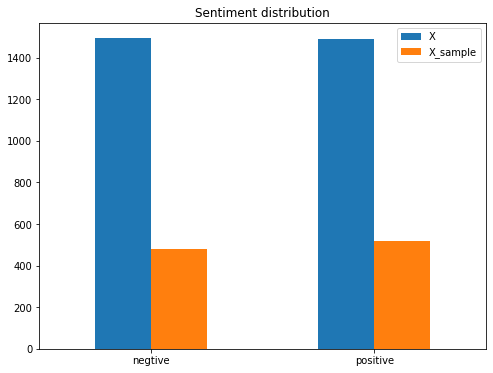

In [17]:
# Plot side-by-side comparison of the distribution between two dataset
df = pd.DataFrame({'X': X.sentiment.value_counts(),
                   'X_sample': X_sample.sentiment.value_counts()})
df.plot.bar(rot=0, figsize = (8,6), title = 'Sentiment distribution')

### 3.2 Feature Creation

In [18]:
# Tokenize the sentence
X['unigrams'] = X['sentence'].apply(lambda x: dmh.tokenize_text(x))
X[0:4]

,sentence,score,sentiment,source,unigrams
0,So there is no way for me to plug it in here i...,0,negtive,amazon_cell,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,positive,amazon_cell,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,positive,amazon_cell,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,negtive,amazon_cell,"[Tied, to, charger, for, conversations, lastin..."


### 3.3 Feature subset selection

In [19]:
# Count the frequency of each term in each document
count_vect = CountVectorizer()
amazon_count_vect = CountVectorizer()
imdb_count_vect = CountVectorizer()
yelp_count_vect = CountVectorizer()

X_counts = count_vect.fit_transform(X.sentence)
X_amazon_counts = amazon_count_vect.fit_transform(X.loc[X['source'] == 'amazon_cell'].sentence)
X_imdb_counts = imdb_count_vect.fit_transform(X.loc[X['source'] == 'imdb'].sentence)
X_yelp_counts = yelp_count_vect.fit_transform(X.loc[X['source'] == 'yelp'].sentence)


In [20]:
# Calculate the frequency of each term in dataset
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
amazon_term_frequencies = np.asarray(X_amazon_counts.sum(axis=0))[0]
imdb_term_frequencies = np.asarray(X_imdb_counts.sum(axis=0))[0]
yelp_term_frequencies = np.asarray(X_yelp_counts.sum(axis=0))[0]

In [21]:
# Sort term frequencies in descending order
temp = [i for i in range(X_counts.shape[1])]
temp.sort(key = lambda s: term_frequencies[s],reverse=True)
X_top_20 = temp[:20]

temp = [i for i in range(X_amazon_counts.shape[1])]
temp.sort(key = lambda s: amazon_term_frequencies[s],reverse=True)
X_amazon_top_20 = temp[:20]

temp = [i for i in range(X_imdb_counts.shape[1])]
temp.sort(key = lambda s: imdb_term_frequencies[s],reverse=True)
X_imdb_top_20 = temp[:20]

temp = [i for i in range(X_yelp_counts.shape[1])]
temp.sort(key = lambda s: yelp_term_frequencies[s],reverse=True)
X_yelp_top_20 = temp[:20]

In [22]:
# Polt the top 20 terms that appear frequently in the whole dataset
x_selected = [count_vect.get_feature_names()[i] for i in X_top_20]
y_selected = sorted(term_frequencies, reverse = True)[:20]

fig = px.bar(x=x_selected, y=y_selected)

fig.update_xaxes(tickangle=315)
fig.update_layout(xaxis_title="Token index", yaxis_title="Frequencies")

fig.show()

C:\Users\dt095\anaconda3\envs\datamining\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [23]:
# Polt the top 20 terms that appear frequently in amazon_cell dataset
x_selected = [amazon_count_vect.get_feature_names()[i] for i in X_amazon_top_20]
y_selected = sorted(amazon_term_frequencies, reverse = True)[:20]

fig = px.bar(x=x_selected, y=y_selected)

fig.update_xaxes(tickangle=315)
fig.update_layout(xaxis_title="Token index", yaxis_title="Frequencies")

fig.show()

C:\Users\dt095\anaconda3\envs\datamining\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [24]:
# Polt the top 20 terms that appear frequently in imdb dataset
x_selected = [imdb_count_vect.get_feature_names()[i] for i in X_imdb_top_20]
y_selected = sorted(imdb_term_frequencies, reverse = True)[:20]

fig = px.bar(x=x_selected, y=y_selected)

fig.update_xaxes(tickangle=315)
fig.update_layout(xaxis_title="Token index", yaxis_title="Frequencies")

fig.show()

In [25]:
# Polt the top 20 terms that appear frequently in yelp dataset
x_selected = [yelp_count_vect.get_feature_names()[i] for i in X_yelp_top_20]
y_selected = sorted(yelp_term_frequencies, reverse = True)[:20]

fig = px.bar(x=x_selected, y=y_selected)

fig.update_xaxes(tickangle=315)
fig.update_layout(xaxis_title="Token index", yaxis_title="Frequencies")

fig.show()

In [26]:
"""
After polting the top 20 terms that appear frequently in different source,  we can find out that there are some different words appear in different chart
"""

'\nAfter polting the top 20 terms that appear frequently in different source,  we can find out that there are some different words appear in different chart\n'

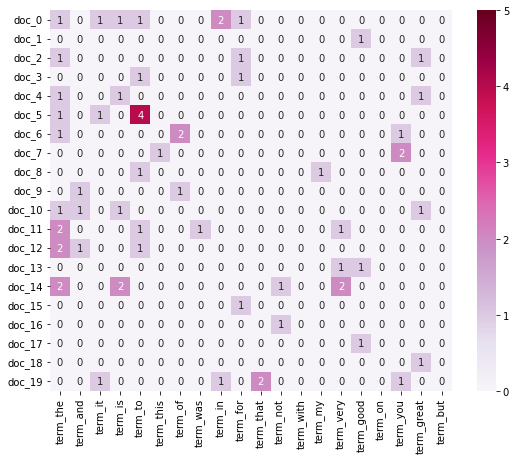

In [27]:
# Plot the heat map of which the x-axis is the top 20 terms that appear frequently
plot_x = ["term_"+count_vect.get_feature_names()[i] for i in X_top_20]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, tuple(X_top_20)].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=5, annot=True)

### 3.4 Dimensionality Reduction

In [28]:
# Using PCA analyze dataset
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
X_reduced

array([[ 0.52403903,  0.287203  ],
       [-0.89836918, -0.36057821],
       [ 0.01536219, -0.66717091],
       ...,
       [-0.50167697,  0.41338005],
       [ 0.49819502,  0.36755818],
       [ 2.33191548, -0.47561215]])

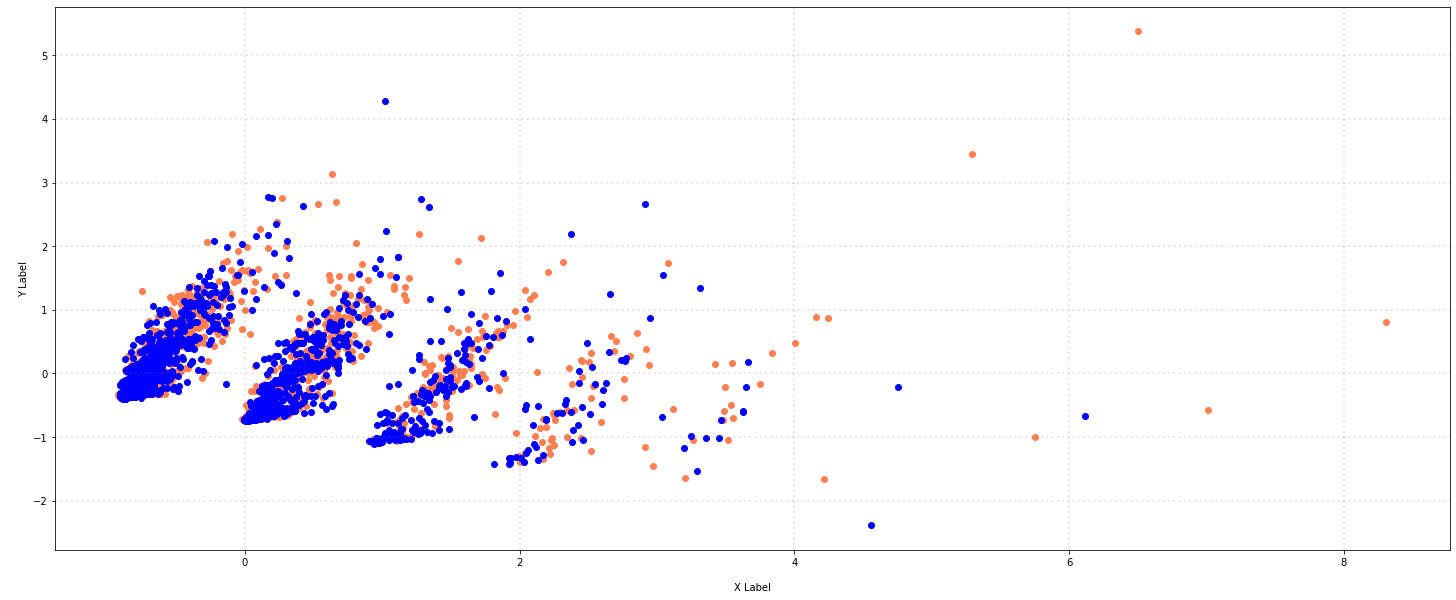

In [29]:
# Plot 2D PCA figure
categories = ['positive', 'negtive']
col = ['coral', 'blue']

fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['sentiment'] == category].T[0]
    ys = X_reduced[X['sentiment'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

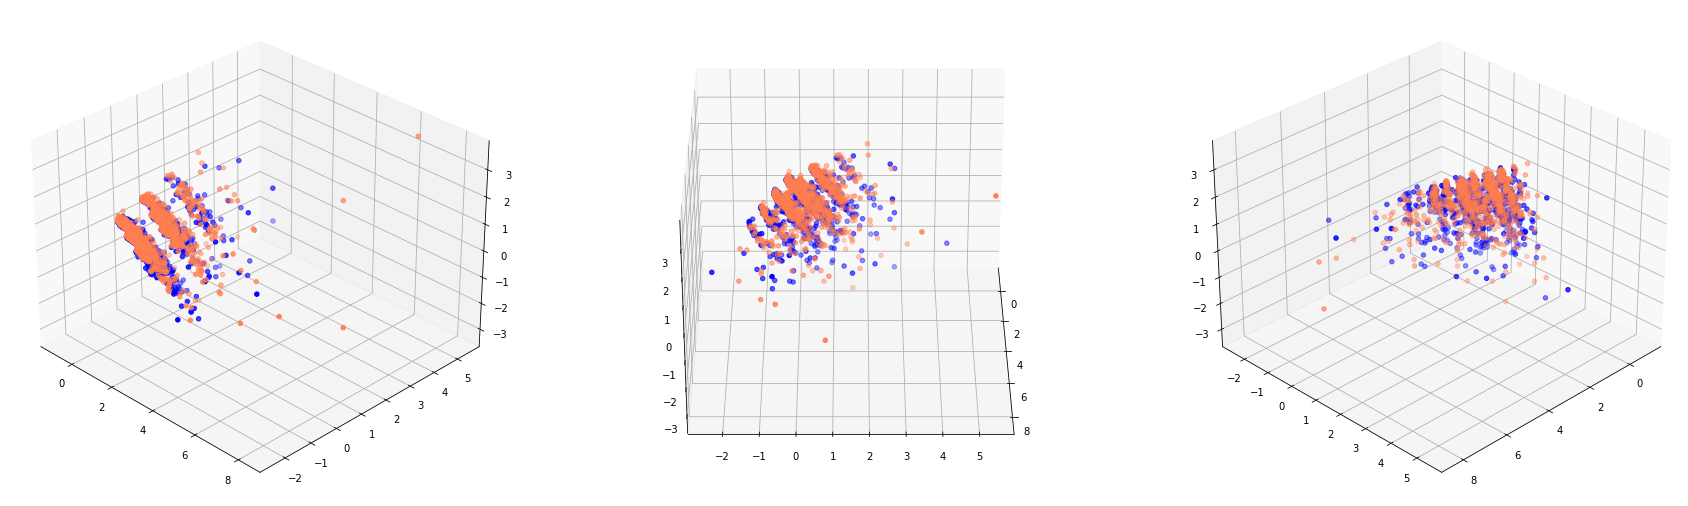

In [30]:
# Plot 3D PCA figure
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
X_reduced
plt.figure(figsize=(30,20))
ax1 = plt.subplot(131,projection='3d')
ax2 = plt.subplot(132,projection='3d')
ax3 = plt.subplot(133,projection='3d')

# fig = plt.figure(figsize = (25,10))
# ax = fig.add_subplot(projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['sentiment'] == category].T[0]
    ys = X_reduced[X['sentiment'] == category].T[1]
    zs = X_reduced[X['sentiment'] == category].T[2]
   
    ax1.scatter(xs, ys, zs,  c = c, marker='o')
    ax2.scatter(xs, ys, zs,  c = c, marker='o')
    ax3.scatter(xs, ys, zs,  c = c, marker='o')


ax1.view_init(30, -45)
ax2.view_init(30, 0)
ax3.view_init(30, 45)


### 3.5 Atrribute Transformation / Aggregation

In [140]:
# Select terms of which the frequency higher than 100
x_selected = []
y_selected = []
for i in range(len(count_vect.get_feature_names())):
    if term_frequencies[i] > 100:
        x_selected.append(count_vect.get_feature_names()[i])
        y_selected.append(term_frequencies[i])

C:\Users\dt095\anaconda3\envs\datamining\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [141]:
# Plot the bar chart of selected terms
fig = px.bar(x=x_selected, y=y_selected)

fig.update_xaxes(tickangle=315)
fig.update_layout(xaxis_title="Token index", yaxis_title="Frequencies")

fig.show()

In [272]:
# Plot the long tail chart

sorted_freq = sorted(term_frequencies, reverse=True)
sorted_freq =sorted_freq[:200]
px.area(sorted_freq)

C:\Users\dt095\anaconda3\envs\datamining\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



<AxesSubplot:>

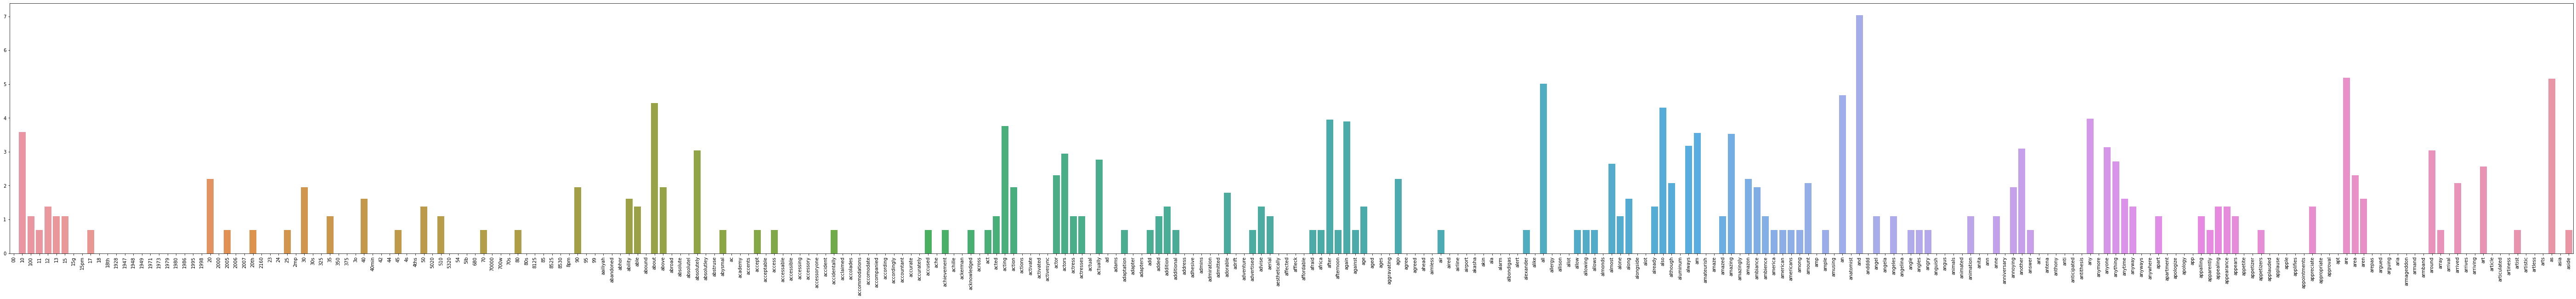

In [99]:
# Plot the log distribution of term frequency
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90)
g

### 3.6 Discretization and Binarization

In [165]:
# Encode feature 'sentiment' into binary representation
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.source)
X['bin_source'] = mlb.transform(X['source']).tolist()

In [166]:
X[0:9]

,sentence,score,sentiment,source,unigrams,bin_source
0,So there is no way for me to plug it in here i...,0,negtive,amazon_cell,"[So, there, is, no, way, for, me, to, plug, it...","[1, 0, 0]"
1,"Good case, Excellent value.",1,positive,amazon_cell,"[Good, case, ,, Excellent, value, .]","[1, 0, 0]"
2,Great for the jawbone.,1,positive,amazon_cell,"[Great, for, the, jawbone, .]","[1, 0, 0]"
3,Tied to charger for conversations lasting more...,0,negtive,amazon_cell,"[Tied, to, charger, for, conversations, lastin...","[1, 0, 0]"
4,The mic is great.,1,positive,amazon_cell,"[The, mic, is, great, .]","[1, 0, 0]"
5,I have to jiggle the plug to get it to line up...,0,negtive,amazon_cell,"[I, have, to, jiggle, the, plug, to, get, it, ...","[1, 0, 0]"
6,If you have several dozen or several hundred c...,0,negtive,amazon_cell,"[If, you, have, several, dozen, or, several, h...","[1, 0, 0]"
7,If you are Razr owner...you must have this!,1,positive,amazon_cell,"[If, you, are, Razr, owner, ..., you, must, ha...","[1, 0, 0]"
8,"Needless to say, I wasted my money.",0,negtive,amazon_cell,"[Needless, to, say, ,, I, wasted, my, money, .]","[1, 0, 0]"


## 6. Data Exploration

In [102]:
# We retrieve 2 sentences for a random record, here, indexed at 50 and 100
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

In [103]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["Not loud enough and doesn't turn on like it should."]
['Integrated seamlessly with the Motorola RAZR phone.']
['I Was Hoping for More.']


In [104]:
# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [105]:
# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


# Part 3
## 1. new data visualizations

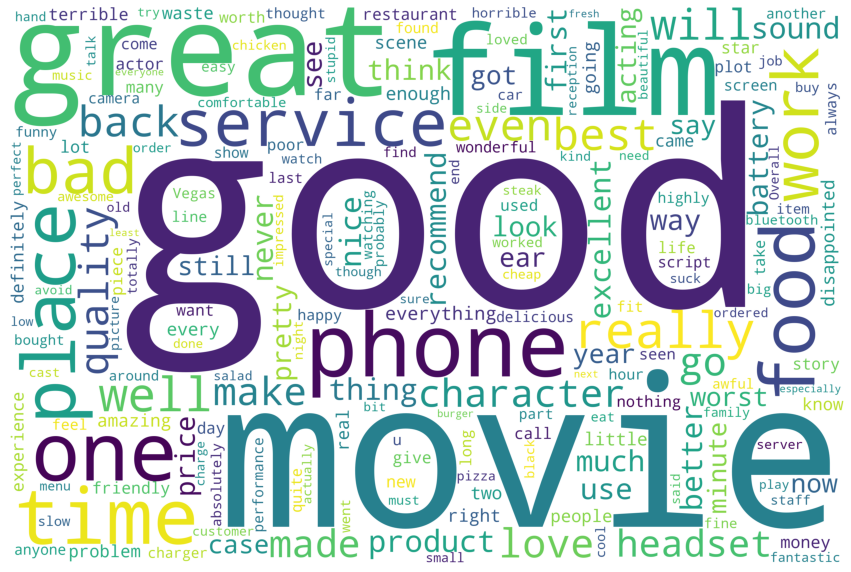

In [200]:
# Plot word cloud of the dataset
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 

text = ' '.join(X.sentence)
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', collocations=False, stopwords = STOPWORDS).generate(text)
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()

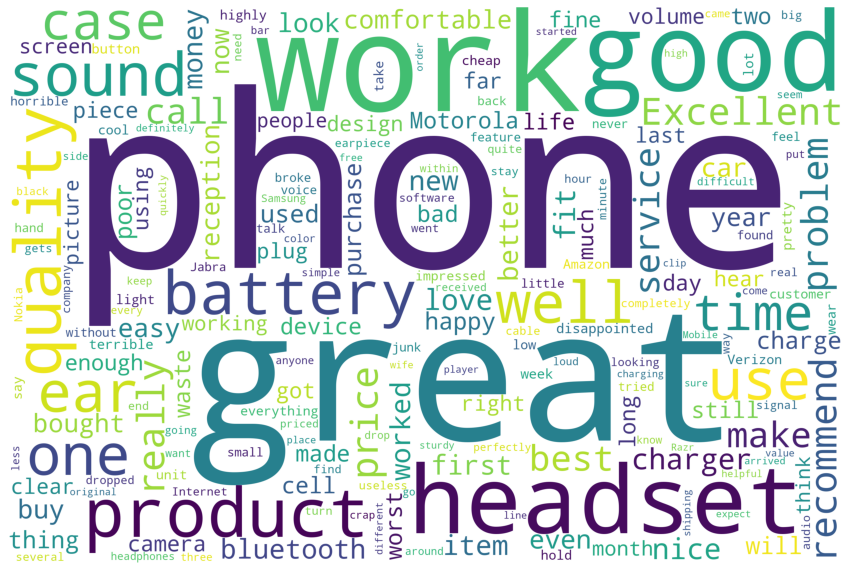

In [191]:
# Plot word cloud of the dataset from amazon_cell
text = ' '.join(X.loc[X['source'] == 'amazon_cell'].sentence)
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', collocations=False, stopwords = STOPWORDS).generate(text)
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()


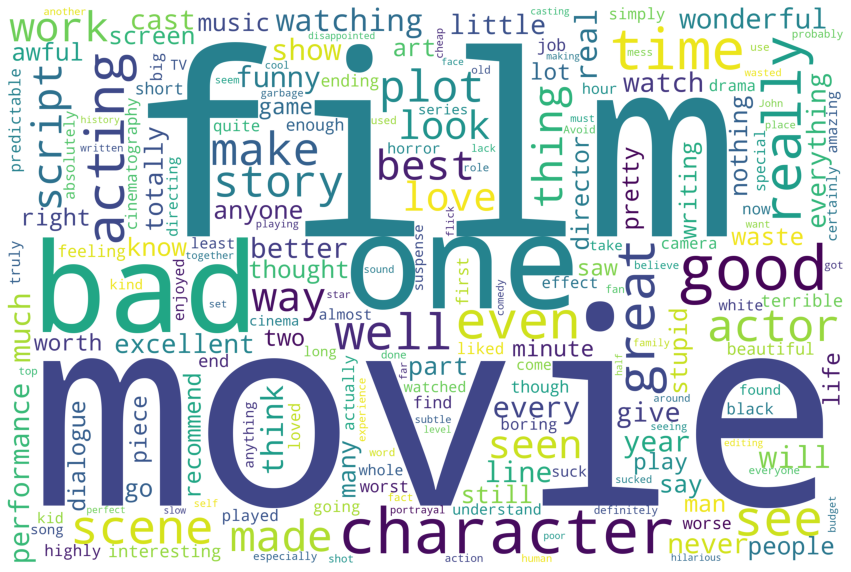

In [192]:
# Plot word cloud of the dataset from imdb
text = ' '.join(X.loc[X['source'] == 'imdb'].sentence)
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', collocations=False, stopwords = STOPWORDS).generate(text)
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()

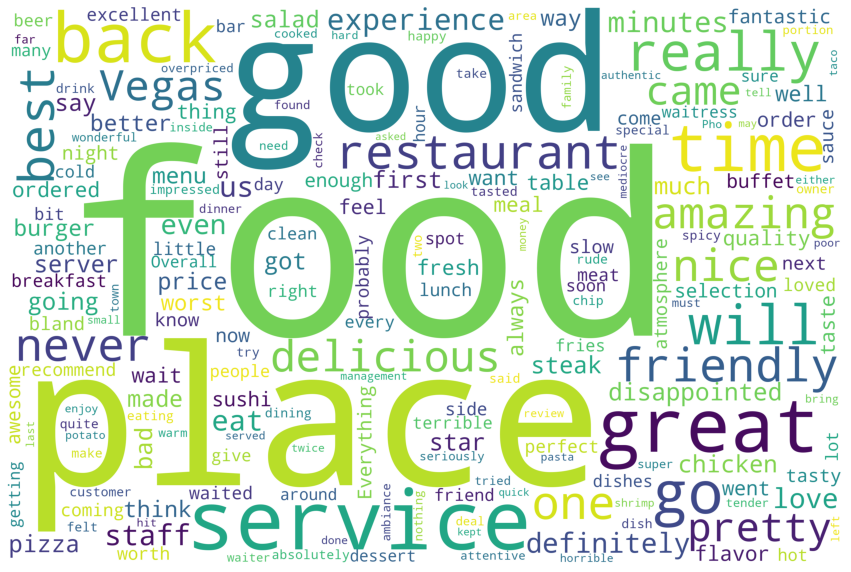

In [201]:
# Plot word cloud of the dataset from yelp
text = ' '.join(X.loc[X['source'] == 'yelp'].sentence)
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', collocations=False, stopwords = STOPWORDS).generate(text)
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()

## 2. TF-IDF features

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [236]:
# vectorizer = TfidfVectorizer()
# X_tfidf = vectorizer.fit_transform(X.sentence)

vectorizer = TfidfVectorizer(smooth_idf=True)
x = vectorizer.fit_transform(X['sentence'])
tfidf = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())


## 3. Naive Bayes classifier

In [258]:
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X.sentence)
print(X_tfidf)

  (0, 1013)	0.39845543988934873
  (0, 647)	0.2233655373587691
  (0, 1982)	0.2314910330235545
  (0, 4793)	0.3319671168188344
  (0, 4835)	0.2754374241479848
  (0, 4531)	0.08660987696634037
  (0, 2158)	0.22274667474668547
  (0, 2314)	0.29538734318239734
  (0, 2432)	0.11967447562998453
  (0, 3387)	0.30868158568324194
  (0, 4609)	0.12743956571028017
  (0, 2809)	0.2286268276414034
  (0, 1829)	0.15641232030594823
  (0, 4987)	0.24912754996231995
  (0, 3043)	0.2233655373587691
  (0, 2427)	0.12068879835601415
  (0, 4545)	0.20758518394408282
  (0, 4161)	0.1873972955866557
  (1, 4861)	0.633627682893175
  (1, 1603)	0.47208678028809276
  (1, 713)	0.512627326445873
  (1, 1993)	0.3359512695758188
  (2, 2449)	0.8223576509783525
  (2, 2023)	0.40205777854454006
  (2, 4531)	0.1950221671536334
  :	:
  (2982, 1387)	0.29330938809811624
  (2982, 5110)	0.29330938809811624
  (2982, 3437)	0.29330938809811624
  (2982, 3857)	0.26883783193000615
  (2982, 2068)	0.27899444540548035
  (2982, 588)	0.24436627576189607
 

In [249]:
from sklearn.naive_bayes import MultinomialNB

In [268]:
# Split data into training data and validation data in 9:1
split = int(0.75 * X_tfidf.shape[0])
tfidf_training = X_tfidf[:split]
tfidf_validation = X_tfidf[split:]
tf_training = X_counts[:split]
tf_validation = X_counts[split:]
training_label = X[:split]['score']
validation_label = X[split:]['score']

In [269]:
clf = MultinomialNB()
clf.fit(tfidf_training, training_label)

prediction = clf.predict(tfidf_validation)
accuracy = np.sum(prediction == validation_label) / len(prediction) 
print("Accuracy of NBC training by TF-IDF: ", accuracy)


Accuracy of NBC training by TF-IDF:  0.8190348525469169


In [270]:
clf = MultinomialNB()
clf.fit(tf_training, training_label)

prediction = clf.predict(tf_validation)
accuracy = np.sum(prediction == validation_label) / len(prediction) 
print("Accuracy of NBC training by term freqencies: ", accuracy)

Accuracy of NBC training by term freqencies:  0.8136729222520107


In [274]:
"""
Since the TF-IDF is a adjusted numerical statistic for computing the term freqency, the accuracy of the classifier that trained by it is higher
"""

'\nSince the TF-IDF is a adjusted numerical statistic for computing the term freqency, the accuracy of the classifier that trained by it is higher\n'

# Part 4

In [ ]:
"""
In the lab, there a advice as following to make the data preprocessing more efficiently

The results of the function that uesd frequently can be stored as variables
e.g. count_vect.get_feature_names()

Creating a new variable could save times doing the same process that already been done
"""